# Task 1


In [1]:
import numpy as np

In [ ]:
arr_1d = np.array([1,2,3,4,5])
arr_2d = np.array([[1,2,3],[4,5,6],[7,8,9,]])

In [ ]:
print("1D Array:", arr_1d)
print("2D Array:\n", arr_2d)

1D Array: [1 2 3 4 5]
2D Array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
print("Sum of 1D Array:", np.sum(arr_1d))
print("Mean of 2D Array:", np.mean(arr_2d))
print("Transpose of 2D Array:\n", arr_2d.T)

Sum of 1D Array: 15
Mean of 2D Array: 5.0
Transpose of 2D Array:
 [[1 4 7]
 [2 5 8]
 [3 6 9]]


In [ ]:
def array_operations(arr_1d, arr_2d):
    print("1D Array:", arr_1d)
    print("2D Array:\n", arr_2d)

    print("Sum of 1D Array:", np.sum(arr_1d))
    print("Mean of 2D Array:", np.mean(arr_2d))
    print("Transpose of 2D Array:\n", arr_2d.T)


arr_1d = np.array([1, 2, 3, 4, 5])
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])


array_operations(arr_1d, arr_2d)

1D Array: [1 2 3 4 5]
2D Array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Sum of 1D Array: 15
Mean of 2D Array: 5.0
Transpose of 2D Array:
 [[1 4 7]
 [2 5 8]
 [3 6 9]]


# Task 2

In [ ]:
# Creating a grayscale image using a 2D NumPy array
image = np.random.randint(0, 256, (5, 5), dtype=np.uint8)
print("Original Image:\n", image)
# Slicing a portion of the image
cropped = image[1:4, 1:4]
print("Cropped Section:\n", cropped)
# Inverting colors
inverted_image = 255 - image
print("Inverted Image:\n", inverted_image)

Original Image:
 [[179 215 147 174 219]
 [157  80  78 109 119]
 [152 231 245 185  37]
 [  4  16  78 101 111]
 [  1 155 114 135 158]]
Cropped Section:
 [[ 80  78 109]
 [231 245 185]
 [ 16  78 101]]
Inverted Image:
 [[ 76  40 108  81  36]
 [ 98 175 177 146 136]
 [103  24  10  70 218]
 [251 239 177 154 144]
 [254 100 141 120  97]]


In [ ]:
def process_image():
    # Creating a grayscale image using a 2D NumPy array
    image = np.random.randint(0, 256, (5, 5), dtype=np.uint8)
    print("Original Image:\n", image)

    # Slicing a portion of the image
    cropped = image[1:4, 1:4]
    print("Cropped Section:\n", cropped)

    # Inverting colors
    inverted_image = 255 - image
    print("Inverted Image:\n", inverted_image)

# Call the function
process_image()

Original Image:
 [[125 246   1  92 156]
 [163 230 208 129 149]
 [  5  66 128  57 204]
 [249 105  50 248 237]
 [255 116 144 164  43]]
Cropped Section:
 [[230 208 129]
 [ 66 128  57]
 [105  50 248]]
Inverted Image:
 [[130   9 254 163  99]
 [ 92  25  47 126 106]
 [250 189 127 198  51]
 [  6 150 205   7  18]
 [  0 139 111  91 212]]


# Task 3


Original Image:


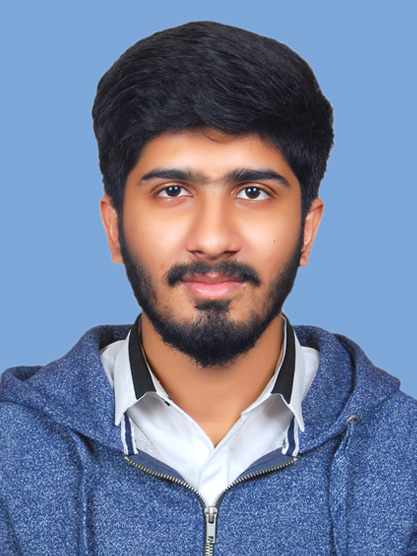

Scaled Image:


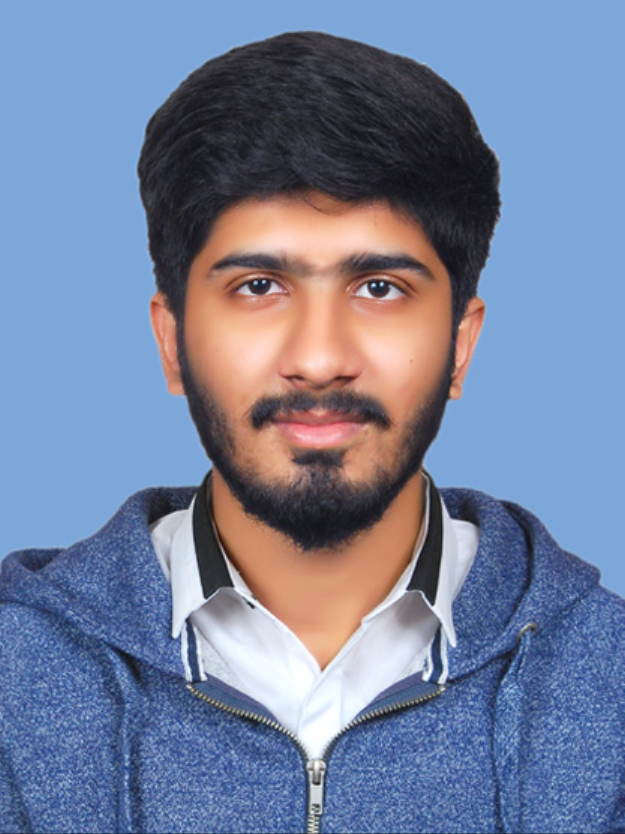

Rotated Image:


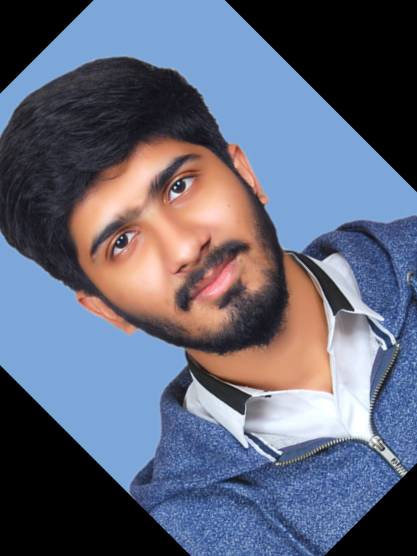

Translated Image:


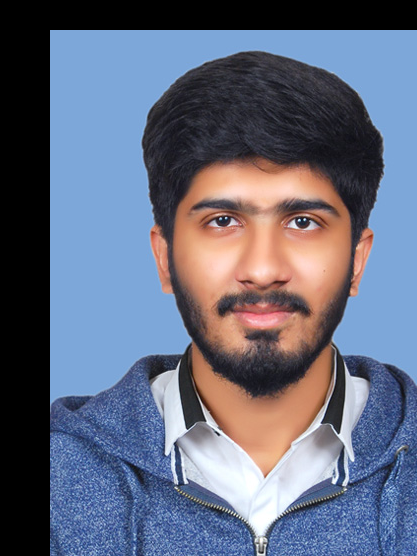

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the image
image = cv2.imread('ME.jpg')

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not load image. Check the file path.")
else:
    # Scaling Transformation
    def scale_image(image, scale_factor):
        rows, cols = image.shape[:2]
        scaling_matrix = np.array([[scale_factor, 0, 0], [0, scale_factor, 0]], dtype=np.float32)
        return cv2.warpAffine(image, scaling_matrix, (int(cols * scale_factor), int(rows * scale_factor)))

    # Rotation Transformation
    def rotate_image(image, angle):
        rows, cols = image.shape[:2]
        rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        return cv2.warpAffine(image, rotation_matrix, (cols, rows))

    # Translation Transformation
    def translate_image(image, tx, ty):
        translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)
        rows, cols = image.shape[:2]
        return cv2.warpAffine(image, translation_matrix, (cols, rows))

    # Apply transformations
    scaled_image = scale_image(image, 1.5)
    rotated_image = rotate_image(image, 45)
    translated_image = translate_image(image, 50, 30)

    # Show the results in Colab
    print("Original Image:")
    cv2_imshow(image)

    print("Scaled Image:")
    cv2_imshow(scaled_image)

    print("Rotated Image:")
    cv2_imshow(rotated_image)

    print("Translated Image:")
    cv2_imshow(translated_image)


# Task 4

Face Region:


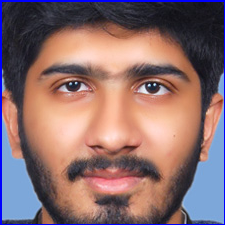

Eye Region:


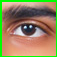

Eye Region:


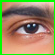

Detected Faces:


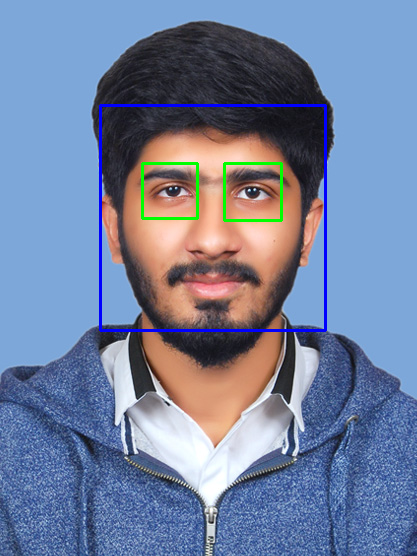

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load an image and check if it's loaded correctly
image = cv2.imread('ME.jpg')  # Replace with your image path
if image is None:
    print("Error: Could not load image. Check the file path.")
else:
    # Convert the image to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load Haar cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=5)

    # Loop through detected faces
    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Extract and display the face region
        face_region = image[y:y+h, x:x+w]
        print("Face Region:")
        cv2_imshow(face_region)

        # Load Haar cascade for eye detection
        eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

        # Detect eyes within the face region
        eyes = eyes_cascade.detectMultiScale(face_region, scaleFactor=1.1, minNeighbors=5)

        for (ex, ey, ew, eh) in eyes:
            # Draw rectangles around the eyes
            cv2.rectangle(face_region, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

            # Extract and display the eye region
            eye_region = face_region[ey:ey+eh, ex:ex+ew]
            print("Eye Region:")
            cv2_imshow(eye_region)

    # Show the final image with detected faces
    print("Detected Faces:")
    cv2_imshow(image)
